### Decision Tree and Random Forest

Consider The Wisconsin Breast Cancer Database. 

This dataset consists of 10 continuous attributes and 1 target class attribute. 

Class attribute shows the observation result, whether the patient is suffering from the benign tumor or malignant tumor. 

Benign tumors do not spread to other parts while the malignant tumor is cancerous. 

Take Target variable as diagnosis

### 1.2 Import the Libraries

In [1]:
import pandas as pd
import numpy as np

### 1.3 Load the dataset

In [3]:
df= pd.read_csv('wisc_bc_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 1.4 Check the data type for dataset?

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### 1.5 Check the data.describe for dataset?

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 1.6 Check the data.groupby count for diagnosis?

In [8]:
diagnosis_counts = df.groupby('diagnosis').size()
print(diagnosis_counts)

diagnosis
B    357
M    212
dtype: int64


### 1.7 drop the first column from the data frame. This is Id column which is not used in modeling?

In [10]:
df = df.drop(columns=['id'])
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

### 1.8 Create a separate dataframe consisting only of the features i.e independent attributes

In [11]:
features_df = df.drop(columns=['diagnosis'])
print(features_df.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

### 1.9 convert the features into z scores as we do not know what units / scales were used and store them in new dataframe

It is always adviced to scale numeric attributes in models that calculate distances.

In [12]:
from sklearn.preprocessing import StandardScaler

features_df = df.drop(columns=['diagnosis'])

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features_df)

features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)

print(features_scaled_df.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

### 1.10 Capture the class values from the 'diagnosis' colum.

In [13]:
class_values = df['diagnosis']

print(class_values.head())

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


### 1.11 Extract the independent variable X and dependent variable Y?

In [14]:
X = df.drop(columns=['diagnosis'])

Y = df['diagnosis']

print("Independent variables (X):")
print(X.head())

print("\nDependent variable (Y):")
print(Y.head())

Independent variables (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  peri

### 1.12 Split the data into train and test set:(70/30)

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['diagnosis'])

Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (398, 30)
X_test shape: (171, 30)
Y_train shape: (398,)
Y_test shape: (171,)


## 1.13 Import all the algorithms we want to test

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#### 1.13a) Prepare an array with decision tree and random forest algorithms

In [22]:
algorithms = [
    DecisionTreeClassifier(),
    RandomForestClassifier()
]
for algorithm in algorithms:
    algorithm.fit(X_train, Y_train)
    predictions = algorithm.predict(X_test)

####  1.13b) Prepare the configuration to run the (X,Y),seed=7

In [26]:
from sklearn.metrics import accuracy_score


X = df.drop(columns=['diagnosis'])


Y = df['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

decision_tree = DecisionTreeClassifier(random_state=7)
random_forest = RandomForestClassifier(random_state=7)

models = [decision_tree, random_forest]

for model in models:
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print(f'{model.__class__.__name__} Accuracy: {accuracy:.2f}')


DecisionTreeClassifier Accuracy: 0.92
RandomForestClassifier Accuracy: 0.97


#### 1.13 c) Every algorithm is tested and results are collected and printed?


In [29]:
Y = Y.apply(lambda x: 1 if x == 'M' else 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, random_state=42)
]

for model in models:
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print(f'{model.__class__.__name__} Accuracy: {accuracy:.2f}')


DecisionTreeClassifier Accuracy: 0.93
RandomForestClassifier Accuracy: 0.96
DecisionTreeClassifier Accuracy: 0.95
RandomForestClassifier Accuracy: 0.96


#### 1.13 d) boxplot algorithm comparison

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

Decision Tree: 0.91 (0.03)
Random Forest: 0.96 (0.03)
Decision Tree (max_depth=5): 0.93 (0.04)
Random Forest (max_depth=5): 0.96 (0.03)


C:\Users\santo\AppData\Local\Temp\ipykernel_18920\2975393080.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


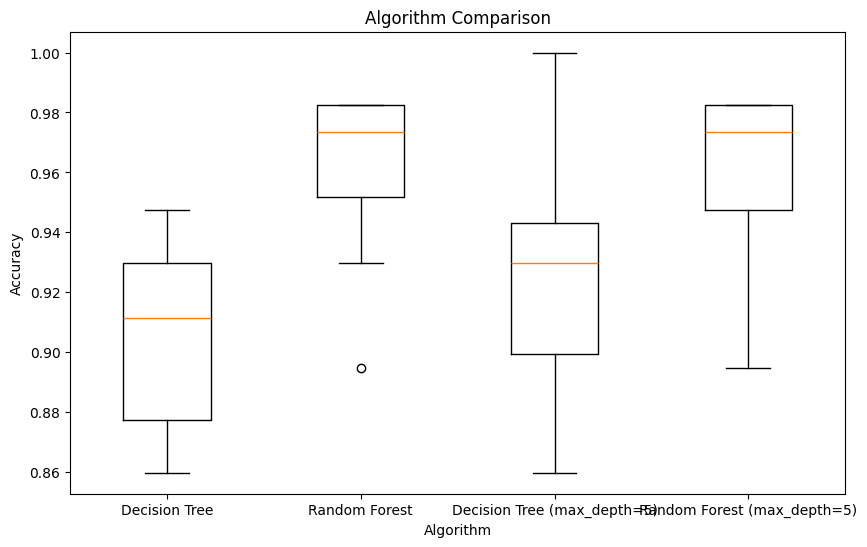

In [32]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.2f} ({cv_results.std():.2f})')

#graph
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()